### Question 1

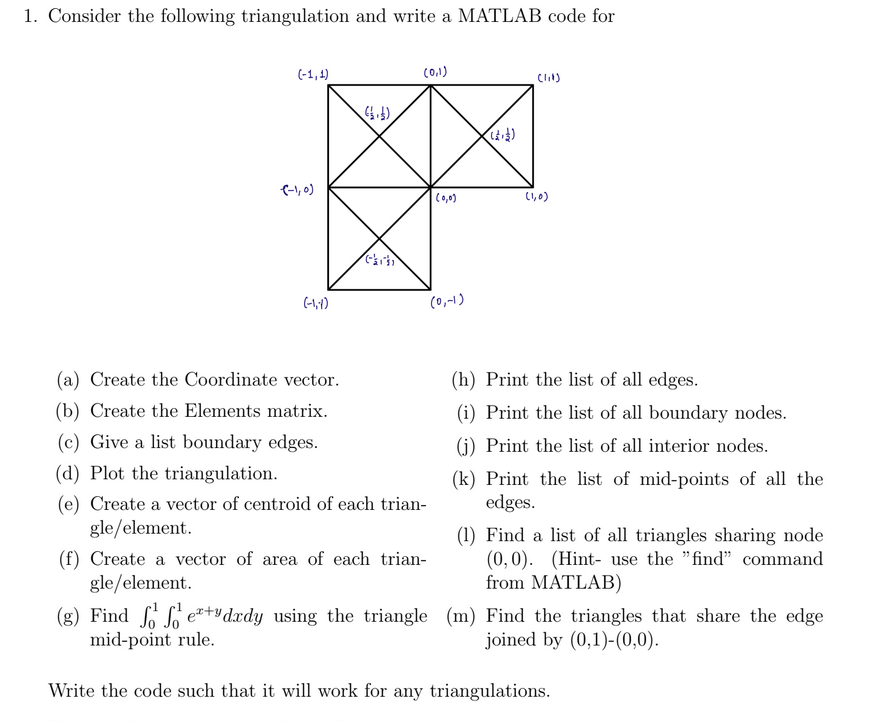

In [81]:
using PyPlot, LinearAlgebra

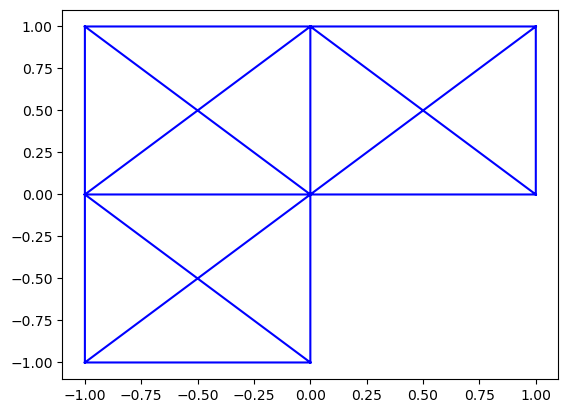

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff2887c0b60>
 PyObject <matplotlib.lines.Line2D object at 0x7ff2887c0da0>

In [82]:
# for L-shaped domain
# PART a, b, c, d
coord = [-1 -1; 0 -1;
            0 0; 1 0; 
            1 1; 0 1;
          -1 1; -1 0;
           -0.5 -0.5; 
            -0.5 0.5; 
             0.5 0.5]

Elem = [1 2 9; 2 3 9;
        3 8 9; 8 1 9; 
        8 3 10; 3 6 10; 
        6 7 10; 7 8 10;
        3 4 11; 4 5 11;
        5 6 11; 6 3 11]

DB = [1 2; 2 3;
      3 4; 4 5; 
      5 6; 6 7; 
      7 8; 8 1]

# since triplot takes 0-based indexing
triangles = Elem .- 1
plt.triplot(coord[:, 1], coord[:, 2], triangles, color="blue")

In [ ]:
# PART e, f, g
function f(cen)
    return exp(cen[1] + cen[2])
end

area_total = 0.0
for i in 1:size(Elem, 1)
    
    # area of the triangle
    coordTi = coord[Elem[i, :], :]
    det_ = [1 1 1; transpose(coordTi)]
    area_elem = 0.5*det(det_)
    a1 = sum(coordTi[:, 1])
    b1 = sum(coordTi[:, 2])
    
    # Centroid of each triangle
    centroid = [a1/3, b1/3]
    println("Centroid of element $i is $centroid")
    global area_total += area_elem*f(centroid)
end

println("\nTotal area using mid-point rule: $area_total")
println("Exact area: 4.439\n")

Centroid of element 1 is [-0.5, -0.8333333333333334]
Centroid of element 2 is [-0.16666666666666666, -0.5]
Centroid of element 3 is [-0.5, -0.16666666666666666]
Centroid of element 4 is [-0.8333333333333334, -0.5]
Centroid of element 5 is [-0.5, 0.16666666666666666]
Centroid of element 6 is [-0.16666666666666666, 0.5]
Centroid of element 7 is [-0.5, 0.8333333333333334]
Centroid of element 8 is [-0.8333333333333334, 0.5]
Centroid of element 9 is [0.5, 0.16666666666666666]
Centroid of element 10 is [0.8333333333333334, 0.5]
Centroid of element 11 is [0.5, 0.8333333333333334]
Centroid of element 12 is [0.16666666666666666, 0.5]

Total area using mid-point rule: 4.315279964273026
Exact area: 4.439



In [84]:
# PART h, i, j, k

println("List of all edges:")
edges = []
for i in 1:size(Elem, 1)
    n1, n2, n3 = Elem[i, 1], Elem[i, 2], Elem[i, 3]
    println("[$n1 $n2; $n2 $n3; $n3 $n1]")
    push!(edges, (min(n1, n2), max(n1, n2)))
    push!(edges, (min(n2, n3), max(n2, n3)))
    push!(edges, (min(n3, n1), max(n3, n1)))
end

println()
edges = unique!(edges)
# println(edges)
for i in 1:length(edges)
    p1, p2 = edges[i][1], edges[i][2]
    _p1 = coord[p1, :]
    _p2 = coord[p2, :]
    midpoint = (_p1 + _p2) ./ 2
    println("Midpoint of edge [$p1, $p2] is $midpoint.")
end

println("\nList of all boundary nodes: ", unique(DB))
println("List of all interior nodes: ", setdiff(1:size(coord, 1), unique(DB)))


List of all edges:
[1 2; 2 9; 9 1]
[2 3; 3 9; 9 2]
[3 8; 8 9; 9 3]
[8 1; 1 9; 9 8]
[8 3; 3 10; 10 8]
[3 6; 6 10; 10 3]
[6 7; 7 10; 10 6]
[7 8; 8 10; 10 7]
[3 4; 4 11; 11 3]
[4 5; 5 11; 11 4]
[5 6; 6 11; 11 5]
[6 3; 3 11; 11 6]

Midpoint of edge [1, 2] is [-0.5, -1.0].
Midpoint of edge [2, 9] is [-0.25, -0.75].
Midpoint of edge [1, 9] is [-0.75, -0.75].
Midpoint of edge [2, 3] is [0.0, -0.5].
Midpoint of edge [3, 9] is [-0.25, -0.25].
Midpoint of edge [3, 8] is [-0.5, 0.0].
Midpoint of edge [8, 9] is [-0.75, -0.25].
Midpoint of edge [1, 8] is [-1.0, -0.5].
Midpoint of edge [3, 10] is [-0.25, 0.25].
Midpoint of edge [8, 10] is [-0.75, 0.25].
Midpoint of edge [3, 6] is [0.0, 0.5].
Midpoint of edge [6, 10] is [-0.25, 0.75].
Midpoint of edge [6, 7] is [-0.5, 1.0].
Midpoint of edge [7, 10] is [-0.75, 0.75].
Midpoint of edge [7, 8] is [-1.0, 0.5].
Midpoint of edge [3, 4] is [0.5, 0.0].
Midpoint of edge [4, 11] is [0.75, 0.25].
Midpoint of edge [3, 11] is [0.25, 0.25].
Midpoint of edge [4, 5] 

In [85]:
# PART l
# search for node (0,0)
search_node = findfirst(x -> x == [0, 0], eachrow(coord))
trig_with_node = []
println("List of triangles sharing the node (0.0, 0.0):\n")
for i in 1:size(Elem, 1)
    if search_node == Elem[i, 1] || search_node == Elem[i, 2] || search_node == Elem[i, 3] 
        println(Elem[i, :])
    end
end


List of triangles sharing the node (0.0, 0.0):

[2, 3, 9]
[3, 8, 9]
[8, 3, 10]
[3, 6, 10]
[3, 4, 11]
[6, 3, 11]


In [86]:
# PART m
node1 = findfirst(x -> x == [0, 1], eachrow(coord))
node2 = findfirst(x -> x == [0, 0], eachrow(coord))

println("List of triangles sharing the edge joined by (0, 1) - (0, 0):\n")
for i in 1:size(Elem, 1)
    if (node1 in Elem[i, :]) && (node2 in Elem[i, :]) 
        println(Elem[i, :])
    end
end

List of triangles sharing the edge joined by (0, 1) - (0, 0):

[3, 6, 10]
[6, 3, 11]


### Question 2

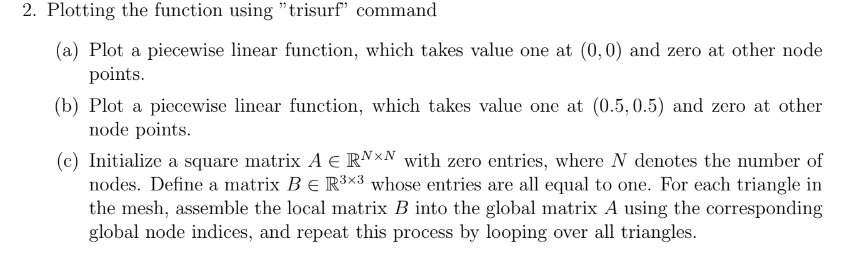
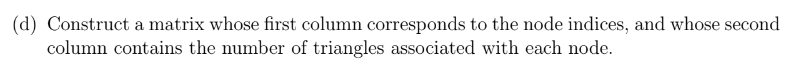

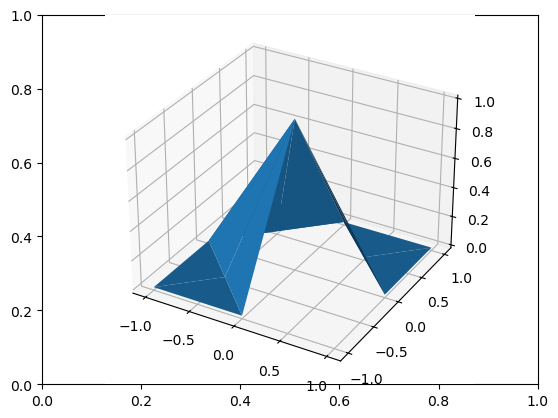

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7ff288811e50>

In [87]:
# PART a
function f1(x)
    if x == [0, 0]
        return 1.0
    else
        return 0.0
    end
end
func_value = [f1(i) for i in eachrow(coord)]
plot_trisurf(coord[:, 1], coord[:, 2], triangles, func_value)

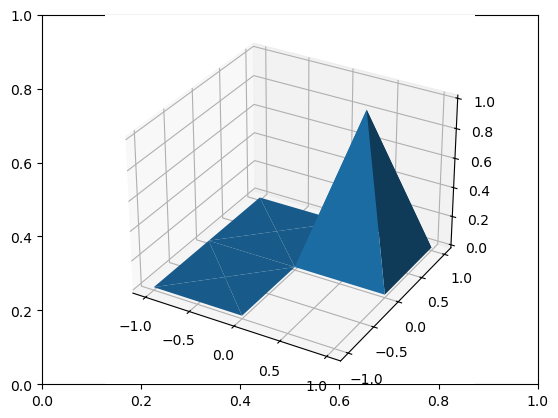

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7ff28881c980>

In [88]:
# PART b
function f2(x)
    if x == [0.5, 0.5]
        return 1.0
    else
        return 0.0
    end
end
func_value = [f2(i) for i in eachrow(coord)]
plot_trisurf(coord[:, 1], coord[:, 2], triangles, func_value)

In [89]:
# PART c
N = size(coord, 1)
A = zeros(N, N)
B = ones(3, 3)

for i in 1:size(Elem, 1)
    A[Elem[i, :], Elem[i, :]] += B
end
A

11×11 Matrix{Float64}:
 2.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  0.0  0.0
 1.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0
 0.0  1.0  6.0  1.0  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  0.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  2.0
 0.0  0.0  0.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  2.0
 0.0  0.0  2.0  0.0  1.0  4.0  1.0  0.0  0.0  2.0  2.0
 0.0  0.0  0.0  0.0  0.0  1.0  2.0  1.0  0.0  2.0  0.0
 1.0  0.0  2.0  0.0  0.0  0.0  1.0  4.0  2.0  2.0  0.0
 2.0  2.0  2.0  0.0  0.0  0.0  0.0  2.0  4.0  0.0  0.0
 0.0  0.0  2.0  0.0  0.0  2.0  2.0  2.0  0.0  4.0  0.0
 0.0  0.0  2.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0  4.0

In [90]:
N = size(coord,1)
count_triangles = zeros(Int, N)

for i in 1:N # loop over nodes
    for j in 1:size(Elem, 1) # loop over elements
        if i in Elem[j, :]
            count_triangles[i] += 1
        end
    end
end

nodes_triangles = hcat(1:N, count_triangles)
println("Node index    Number of associated triangles")

for i in 1:size(nodes_triangles,1)
    println(nodes_triangles[i,1], "\t\t\t", nodes_triangles[i,2])
end

Node index    Number of associated triangles
1			2
2			2
3			6
4			2
5			2
6			4
7			2
8			4
9			4
10			4
11			4
